In [ ]:
 ## Richardson, TX Weather Trends (2020–2024)

 ## This notebook presents a final summary of key temperature trends in Richardson, Texas over the past 5 years. We use simple yet powerful data analysis to explore:

## - Seasonal temperature patterns
## - Year-over-year warming or cooling
## - Heat range variations
## - Changes in extreme temperatures 

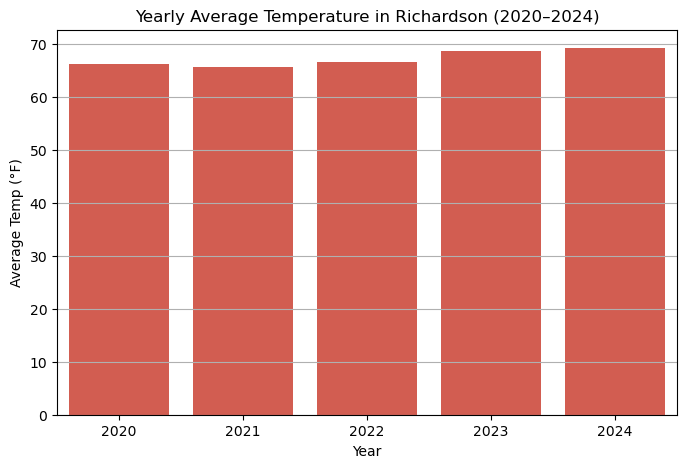

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\harvi\\Desktop\\richardson-weather-analysis\\data\\richardson weather from 1-2020 to 12-2024.csv", parse_dates=['DATE'])
df.set_index('DATE', inplace=True)

df['year'] = df.index.year
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['temp_range'] = df['TMAX'] - df['TMIN']
df['TAVG'] = (df['TMAX'] + df['TMIN']) / 2

yearly_avg = df.groupby('year')['TAVG'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, color="#E74C3C", legend=False)
plt.title("Yearly Average Temperature in Richardson (2020–2024)")
plt.ylabel("Average Temp (°F)")
plt.xlabel("Year")
plt.grid(axis='y')
plt.show()

In [2]:
# Richardson is experiencing gradual warming over the years.
# This can be caused by global warming, or urban heat islands.

<Figure size 1200x600 with 0 Axes>

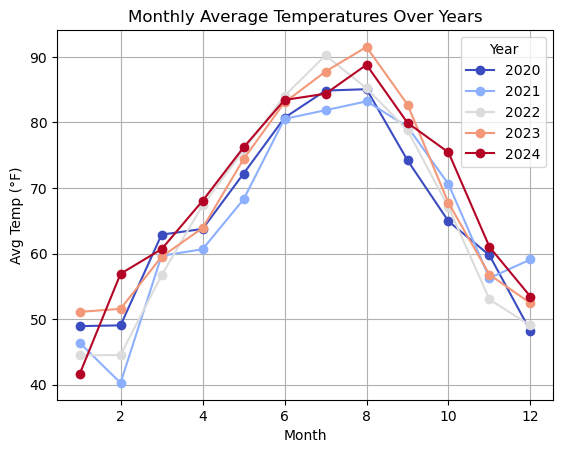

In [9]:
monthly_avg = df.groupby(['year', 'month'])['TAVG'].mean().unstack(level=0)

plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o', cmap='coolwarm')
plt.title("Monthly Average Temperatures Over Years")
plt.ylabel("Avg Temp (°F)")
plt.xlabel("Month")
plt.legend(title="Year")
plt.grid(True)
plt.show()

In [ ]:
# This chart helps us compare winters and summers across years.
# 2024 has had higher temperatures compared to 2021.

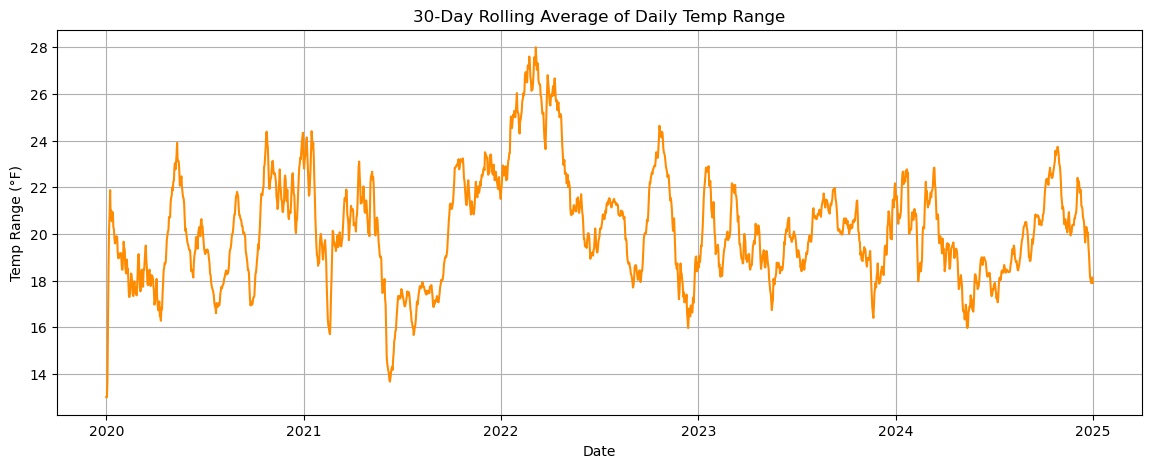

In [10]:
df['temp_range_30d'] = df['temp_range'].rolling(30, min_periods=1).mean()

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['temp_range_30d'], color='darkorange')
plt.title("30-Day Rolling Average of Daily Temp Range")
plt.ylabel("Temp Range (°F)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [3]:
# This shows how wide the gap is between daytime highs and nighttime lows.
# It is difficult to ovserve a trend throughout the five years, as throughout the data, the range is consistent.
# From middle 2021 to early 2022, the temperature range has increased. 
# This would have resulted in mornings being cold and afternoons being warm.

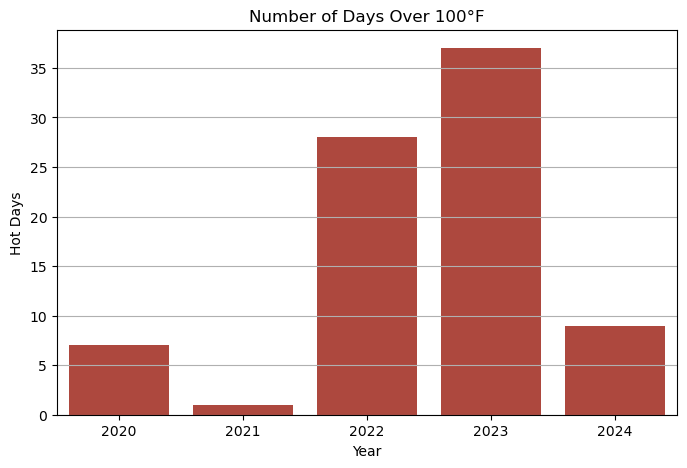

In [11]:
hot_days = df[df['TMAX'] > 100].groupby('year').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=hot_days.index, y=hot_days.values, color="#C0392B", legend=False)
plt.title("Number of Days Over 100°F")
plt.ylabel("Hot Days")
plt.xlabel("Year")
plt.grid(axis='y')
plt.show()

In [13]:
# The amount sharply rose in 2022 comapred to 2021, and it went up further in 2023.
# However, in 2024, the number went down.
# This leads us to question how climate change has been affecting Richardson.